# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Support Vector Machines

"A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning
model, capable of performing linear or nonlinear classification, regression, and even
outlier detection. It is one of the most popular models in Machine Learning, and anyone
interested in Machine Learning should have it in their toolbox. SVMs are particularly
well suited for classification of complex but small- or medium-sized datasets."

# Linear SVM Classification

"The two classes can clearly be separated easily with a straight line (they are linearly separable).  
The left plot shows the decision boundaries of three possible linear classifiers. The  
model whose decision boundary is represented by the dashed line is so bad that it  
does not even separate the classes properly. The other two models work perfectly on  
this training set, but their decision boundaries come so close to the instances that  
these models will probably not perform as well on new instances. In contrast, the  
solid line in the plot on the right represents the decision boundary of an SVM classifier;  
this line not only separates the two classes but also stays as far away from the  
closest training instances as possible. You can think of an SVM classifier as fitting the"  
widest possible street (represented by the parallel dashed lines) between the classes.  
This is called large margin classification.

![title](images/svm_1.png)

"SVMs are sensitive to the feature scales, as you can see in  
Figure 5-2: on the left plot, the vertical scale is much larger than the  
horizontal scale, so the widest possible street is close to horizontal.  
After feature scaling (e.g., using Scikit-Learn’s StandardScaler),  
the decision boundary looks much better (on the right plot)."

![title](images/svm_2.png)

## Soft Margin Classification

"If we strictly impose that all instances be off the street and on the right side, this is  
called hard margin classification. There are two main issues with hard margin classification.  
First, it only works if the data is linearly separable, and second it is quite sensitive  
to outliers"

![title](images/svm_3.png)

"To avoid these issues it is preferable to use a more flexible model. The objective is to  
find a good balance between keeping the street as large as possible and limiting the  
margin violations (i.e., instances that end up in the middle of the street or even on the  
wrong side). This is called soft margin classification."

"In Scikit-Learn’s SVM classes, you can control this balance using the C hyperparameter:  
a smaller C value leads to a wider street but more margin violations. Figure 5-4  
shows the decision boundaries and margins of two soft margin SVM classifiers on a  
nonlinearly separable dataset. On the left, using a low C value the margin is quite   
large, but many instances end up on the street. On the right, using a high C value the  
classifier makes fewer margin violations but ends up with a smaller margin. However,  
it seems likely that the first classifier will generalize better: in fact even on this training  
set it makes fewer prediction errors, since most of the margin violations are  
actually on the correct side of the decision boundary."

![title](images/svm_4.png)

TIP: "If your SVM model is overfitting, you can try regularizing it by  
reducing C."


"The following Scikit-Learn code loads the iris dataset, scales the features, and then  
trains a linear SVM model (using the LinearSVC class with C = 1 and the hinge loss  
function, described shortly) to detect Iris-Virginica flowers. The resulting model is  
represented on the left of Figure 5-4."

In [19]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [3]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

NOTE: "Unlike Logistic Regression classifiers, SVM classifiers do not output  
probabilities for each class."

"Alternatively, you could use the SVC class, using SVC(kernel="linear", C=1), but it  
is much slower, especially with large training sets, so it is not recommended. Another  
option is to use the SGDClassifier class, with SGDClassifier(loss="hinge",  
alpha=1/(m*C)). This applies regular Stochastic Gradient Descent (see Chapter 4) to  
train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it  
can be useful to handle huge datasets that do not fit in memory (out-of-core training),  
or to handle online classification tasks."

TIP: "The LinearSVC class regularizes the bias term, so you should center  
the training set first by subtracting its mean. This is automatic if  
you scale the data using the StandardScaler. Moreover, make sure  
you set the loss hyperparameter to "hinge", as it is not the default  
value. Finally, for better performance you should set the dual  
hyperparameter to False, unless there are more features than  
training instances (we will discuss duality later in the chapter)."

# Non-Linear Classification

"Although linear SVM classifiers are efficient and work surprisingly well in many  
cases, many datasets are not even close to being linearly separable. One approach to  
handling nonlinear datasets is to add more features, such as polynomial features (as  
you did in Chapter 4); in some cases this can result in a linearly separable dataset.  
Consider the left plot in Figure 5-5: it represents a simple dataset with just one feature,  
x1. This dataset is not linearly separable, as you can see. But if you add a second  
feature x2 = (x1)2, the resulting 2D dataset is perfectly linearly separable."  

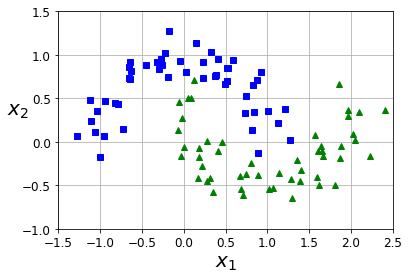

In [11]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# X is a 2 dimensional array [x1, x2]
# Y is a 1 dimensional array 
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

"To implement this idea using Scikit-Learn, create a Pipeline containing a PolynomialFeatures   
transformer (discussed in “Polynomial Regression” on page 128), followed  
by a StandardScaler and a LinearSVC. Let’s test this on the moons dataset: this   
is a toy dataset for binary classification in which the data points are shaped as two  
interleaving half circles (see Figure 5-6). You can generate this dataset using the  
make_moons() function:"

In [12]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

C:\Users\edwar\anaconda3\envs\ml_learning\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

Saving figure moons_polynomial_svc_plot


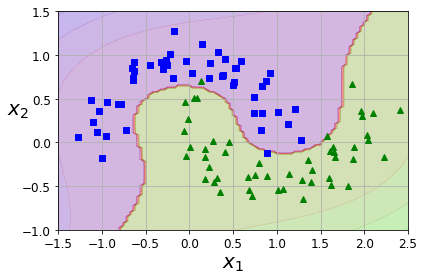

In [13]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

## Polynomial Kernel

"The kernel trick makes it possible to get the same result as if you   
had added many polynomial features, even with very high-degree polynomials,   
without actually having to add them"  

In [14]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

"This code trains an SVM classifier using a third-degree polynomial kernel. It is represented  
on the left in Figure 5-7. On the right is another SVM classifier using a 10th degree  
polynomial kernel. Obviously, if your model is overfitting, you might want to  
reduce the polynomial degree. Conversely, if it is underfitting, you can try increasing  
it. The hyperparameter coef0 controls how much the model is influenced by highdegree  
polynomials versus low-degree polynomials."

In [15]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Saving figure moons_kernelized_polynomial_svc_plot


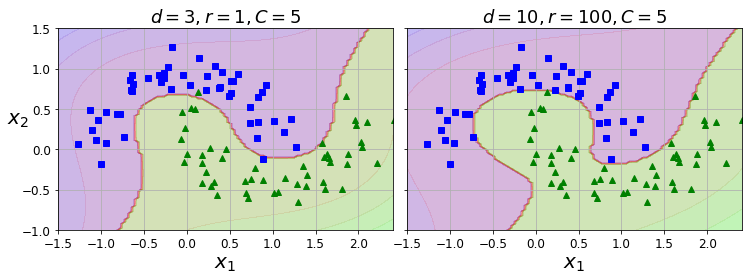

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

## Similarity Features

"Another technique to tackle nonlinear problems is to add features computed using a  
similarity function, which measures how much each instance resembles a particular  
landmark"

![title](images/non_linear_svm_1.png)

"This is a bell-shaped function varying from 0 (very far away from the landmark) to 1  
(at the landmark). Now we are ready to compute the new features. For example, let’s  
look at the instance x1 = –1: it is located at a distance of 1 from the first landmark and  
2 from the second landmark. Therefore its new features are x2 = exp(–0.3 × 12) ≈ 0.74  
and x3 = exp(–0.3 × 22) ≈ 0.30. The plot on the right in Figure 5-8 shows the transformed  
dataset (dropping the original features). As you can see, it is now linearly  
separable."

Saving figure kernel_method_plot


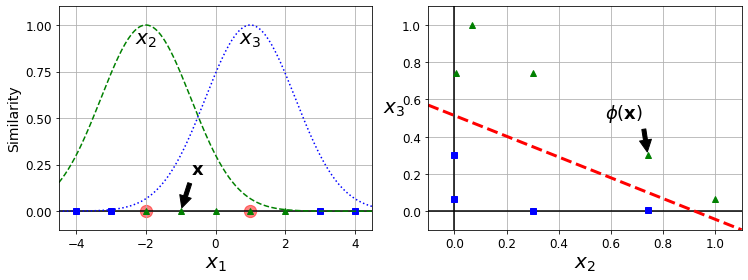

In [18]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

X1D = np.linspace(-4, 4, 9).reshape(-1, 1)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=b1)

save_fig("kernel_method_plot")
plt.show()

In [20]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


"You may wonder how to select the landmarks. The simplest approach is to create a  
landmark at the location of each and every instance in the dataset. Doing that creates  
many dimensions and thus increases the chances that the transformed training set  
will be linearly separable. The downside is that a training set with m instances and n  
features gets transformed into a training set with m instances and m features (assuming  
you drop the original features). If your training set is very large, you end up with  
an equally large number of features."

## Gaussian RBF Kernel

"Just like the polynomial features method, the similarity features method can be useful  
with any Machine Learning algorithm, but it may be computationally expensive to  
compute all the additional features, especially on large training sets. Once again the  
kernel trick does its SVM magic, making it possible to obtain a similar result as if you  
had added many similarity features. Let’s try the SVC class with the Gaussian RBF  
kernel"

In [22]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Saving figure moons_rbf_svc_plot


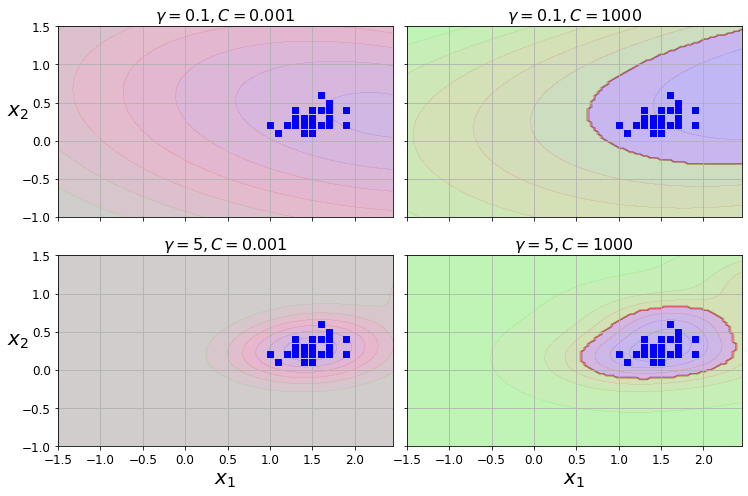

In [23]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

save_fig("moons_rbf_svc_plot")
plt.show()

"Increasing gamma makes the bell-shaped curve narrower (see the lefthand plots in Figure 5-8).  
As a result, each instance’s range of influence is smaller: the decision boundary ends up    
being more irregular, wiggling around individual instances. Conversely, a small gamma    
value makes the bell-shaped curve wider: instances have a larger range of influence,    
and the decision boundary ends up smoother."


"γ acts like a regularization hyperparameter: if your model is overfitting,   
you should reduce it; if it is underfitting, you should increase it (similar to the C hyperparameter)."

"Other kernels exist but are used much more rarely. Some kernels are specialized for  
specific data structures. String kernels are sometimes used when classifying text documents  
or DNA sequences (e.g., using the string subsequence kernel or kernels based on  
the Levenshtein distance)."

TIP: "With so many kernels to choose from, how can you decide which  
one to use? As a rule of thumb, you should always try the linear  
kernel first (remember that LinearSVC is much faster than SVC(kernel="linear")),  
especially if the training set is very large or if it  
has plenty of features. If the training set is not too large, you should  
also try the Gaussian RBF kernel; it works well in most cases. Then  
if you have spare time and computing power, you can experiment  
with a few other kernels, using cross-validation and grid search.  
You’d want to experiment like that especially if there are kernels  
specialized for your training set’s data structure."

## Computational Complexity

"The LinearSVC class is based on the liblinear library, which implements an optimized  
algorithm for linear SVMs.1 It does not support the kernel trick, but it scales  
almost linearly with the number of training instances and the number of features. Its  
training time complexity is roughly O(m × n).

The algorithm takes longer if you require very high precision. This is controlled by  
the tolerance hyperparameter ϵ (called tol in Scikit-Learn). In most classification  
tasks, the default tolerance is fine.

The SVC class is based on the libsvm library, which implements an algorithm that  
supports the kernel trick.2 The training time complexity is usually between O(m2 × n)  
and O(m3 × n). Unfortunately, this means that it gets dreadfully slow when the number  
of training instances gets large (e.g., hundreds of thousands of instances). This  
algorithm is perfect for complex small or medium-sized training sets. It scales well  
with the number of features, especially with sparse features (i.e., when each instance  
has few nonzero features). In this case, the algorithm scales roughly with the average  
number of nonzero features per instance. Table 5-1 compares Scikit-Learn’s SVM  
classification classes."

![title](images/non_linear_svm_2.png)
